In [ ]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.0/217.0 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 2.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=3be68a43660ecc1c571c639420103990095fd29f557

In [19]:
# 1. TRATAMIENTO DEL DATO
# =========================
import numpy as np
import pandas as pd

# Gráficos
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import missingno as msno
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Analisis Estadístico
# =======================
from scipy.stats import normaltest

In [20]:
# Descarga de datos
# ======================
file = ('https://raw.githubusercontent.com/JorgeMendiProject/TFM/main/DatasetSinInterpolar.csv')

# Lectura de datos a partir del archivo .csv             

df = pd.read_csv(file, delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          216 non-null    object 
 1   TasaTPIB       72 non-null     float64
 2   EuriborM       216 non-null    float64
 3   ParoT          72 non-null     float64
 4   SalarioMedio   18 non-null     float64
 5   IPC            216 non-null    float64
 6   CTotalConsumo  18 non-null     float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


               Missings
Fecha                 0
TasaTPIB            144
EuriborM              0
ParoT               144
SalarioMedio        198
IPC                   0
CTotalConsumo       198


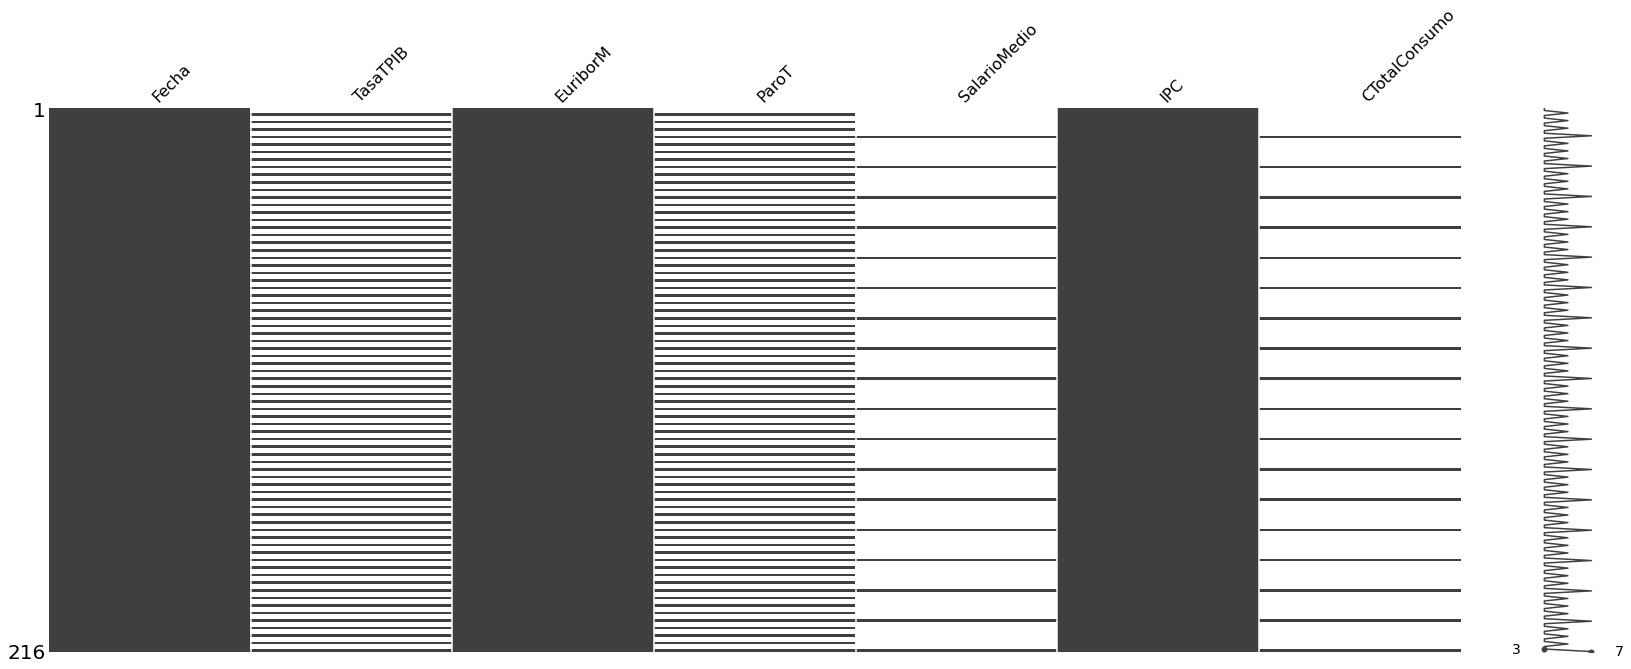

In [21]:
# Impresión de datos faltantes
# ==========================
missings = pd.DataFrame(df.isna().sum(), columns=['Missings'])
msno.matrix(df)
Describe = df.describe()
print(missings)

Se realiza un estudio de los datos faltantes:

A partir de estos resultados se decide interpolar las siguientes variables:

TasaTPIB: C- ParoT: Como la peridicidad del dato es trimestral y es un indicador atrasado, sobre la evolución de la variable en ese trimestre, se interpolará el dato obtenido en el siguiente trimestre, es decir, el dato de Marzo se interpolará en Enero y Febrero.

ParoT: Como la peridicidad del dato es trimestral y es un indicador atrasado, sobre la evolución de la variable en ese trimestre, se interpolará el dato obtenido en el siguiente trimestre, es decir, el dato de Marzo se interpolará en Enero y Febrero.

SalarioMedio: Es un dato con periodicidad anualy es un indicador atrasado, sobre la evolución de la variable en ese año, se interpolará el dato obtenido en el siguiente trimestre, es decir, el dato de 2005 se interpolará desde Enero a Diciembre de 2005.

Consumo: Es un dato con periodicidad anualy es un indicador atrasado, sobre la evolución de la variable en ese año, se interpolará el dato obtenido en el siguiente trimestre, es decir, el dato de 2005 se interpolará desde Enero a Diciembre de 2005.
[6]
0 s

In [22]:
# Descarga de datos
# ======================
file = ('https://raw.githubusercontent.com/JorgeMendiProject/TFM/main/DatasetInterpolado.csv')

# Lectura de datos a partir del archivo .csv             

df = pd.read_csv(file, delimiter=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          216 non-null    object 
 1   TasaTPIB       216 non-null    float64
 2   EuriborM       216 non-null    float64
 3   ParoT          216 non-null    float64
 4   SalarioMedio   216 non-null    int64  
 5   IPC            216 non-null    float64
 6   CTotalConsumo  216 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 11.9+ KB


               Missings
Fecha                 0
TasaTPIB              0
EuriborM              0
ParoT                 0
SalarioMedio          0
IPC                   0
CTotalConsumo         0


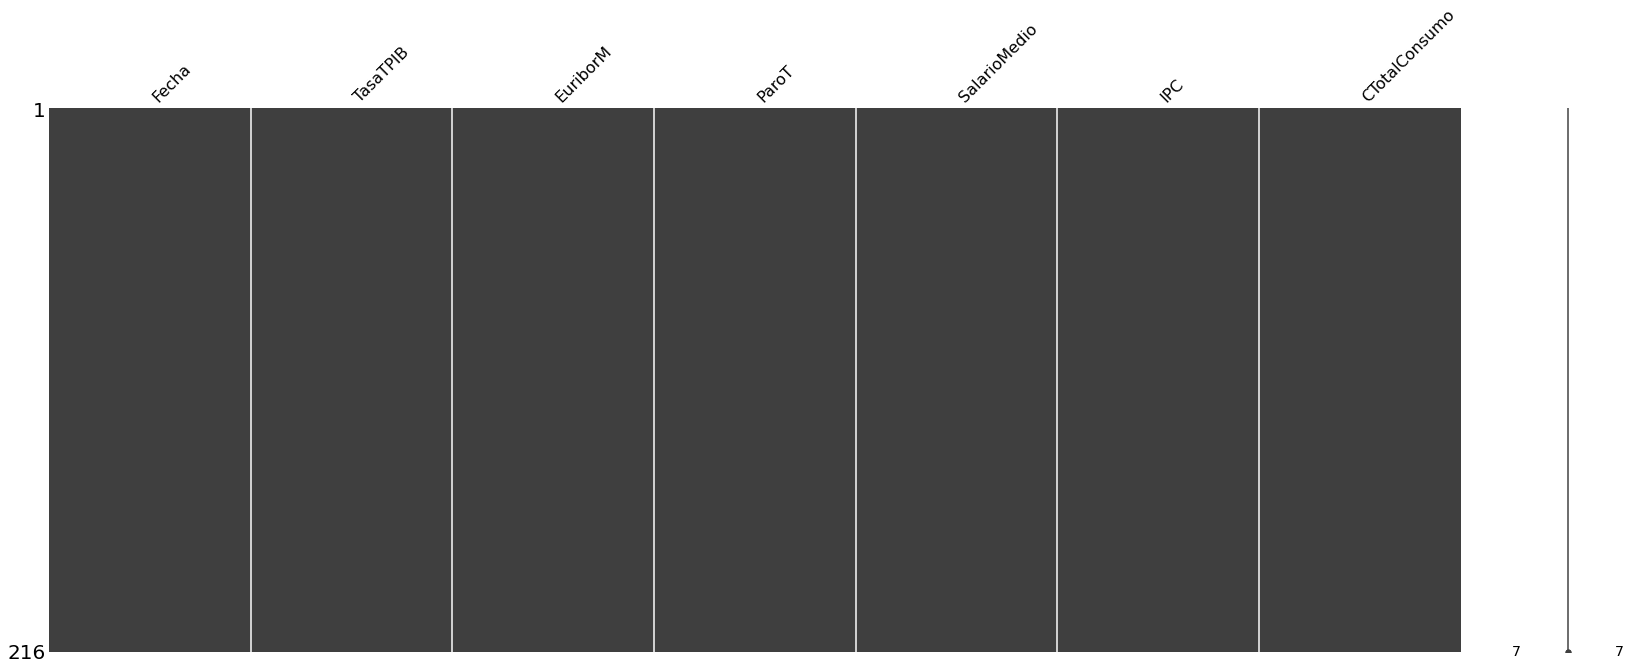

In [23]:
# Impresión datos faltantes Interpolado
# =======================

missings = pd.DataFrame(df.isna().sum(), columns=['Missings'])
msno.matrix(df)
Describe = df.describe()
print(missings)

In [24]:
# 2. PREPROCESADO DEL DATO
# =========================

# Conversion del formato fecha


df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df = df.set_index('Fecha') 
df = df.asfreq('M') # Agregamos la serie con una frecuencia mensual
df = df.sort_index()

In [25]:
# Creamos dos variables nuevas, mes y año

df['Año'] = df.index.year
df['Mes'] = df.index.month

In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TasaTPIB,216.0,0.369437,0.672602,-2.6003,0.0381,0.565,0.86655,1.1505
EuriborM,216.0,1.657509,1.586187,-0.3560,0.1645,1.458,2.42225,5.3930
ParoT,216.0,16.315972,5.856216,7.9300,11.2100,16.465,21.02000,26.9400
SalarioMedio,216.0,23962.277778,2830.826123,18601.0000,21168.0000,25150.500,26449.00000,27292.0000
IPC,216.0,0.162500,0.591672,-1.9000,-0.1000,0.200,0.50000,1.4000
CTotalConsumo,216.0,591589.388889,70666.090743,432783.0000,570855.0000,606262.500,627013.00000,701308.0000
Año,216.0,2010.500000,5.200179,2002.0000,2006.0000,2010.500,2015.00000,2019.0000
Mes,216.0,6.500000,3.460071,1.0000,3.7500,6.500,9.25000,12.0000


In [27]:
df.head(5)

,TasaTPIB,EuriborM,ParoT,SalarioMedio,IPC,CTotalConsumo,Año,Mes
Fecha,,,,,,,,
2002-01-31,0.4307,3.483,11.55,18601,-0.1,432783,2002,1
2002-02-28,0.4307,3.594,11.55,18601,0.1,432783,2002,2
2002-03-31,0.4307,3.816,11.55,18601,0.8,432783,2002,3
2002-04-30,0.8211,3.860,11.15,18601,1.4,432783,2002,4
2002-05-31,0.8211,3.963,11.15,18601,0.4,432783,2002,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d0df7a00>,
      dtype=object)

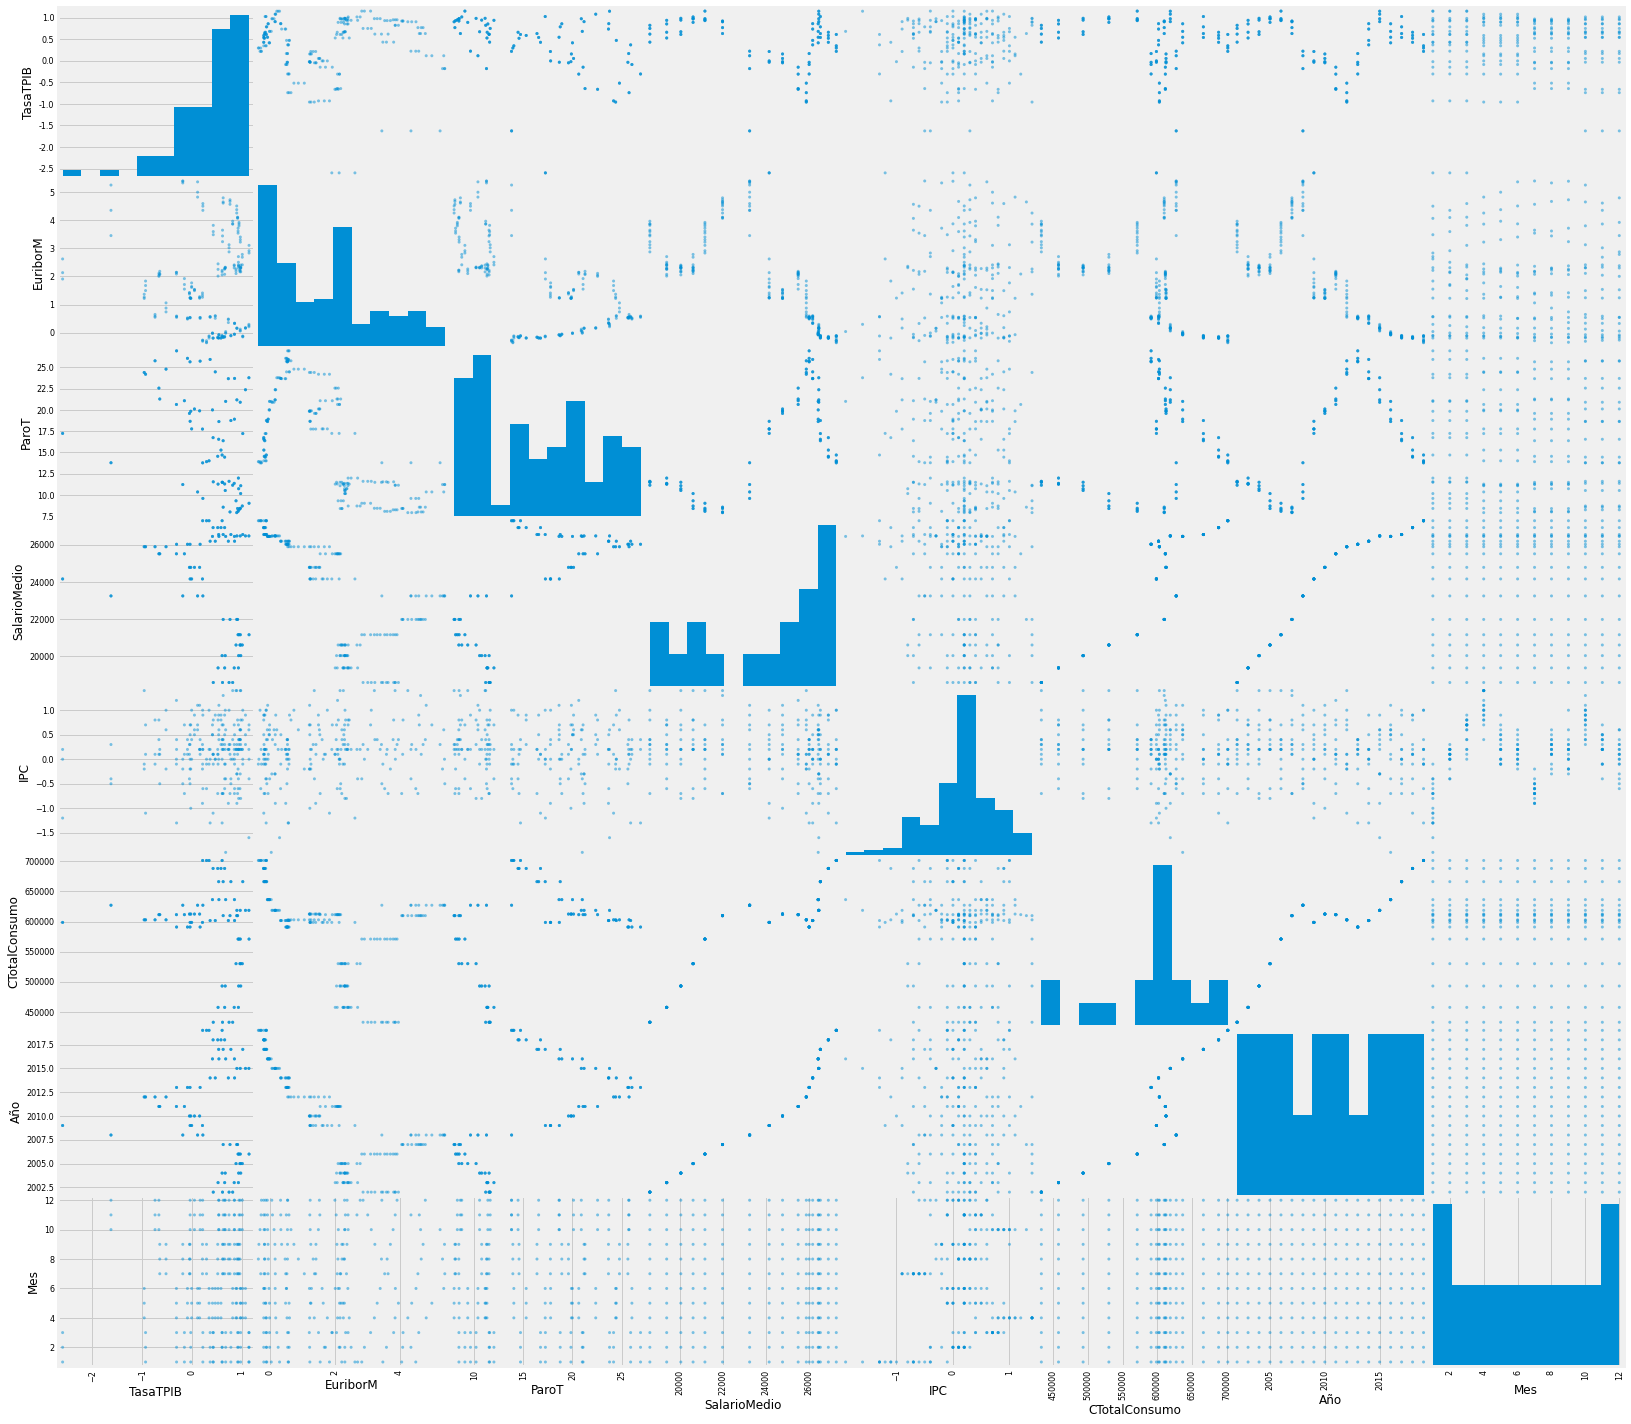

In [28]:
# 3. EXPLORACIÓN GRÁFICA
# =======================

# 3.1 SCATTER MATRIX

# Genera el Plot de correlación, la parte que se encuentra en la diagonal principal es el histograma de la variable en cuestión.

scatter_matrix(df, figsize=(25,25))  

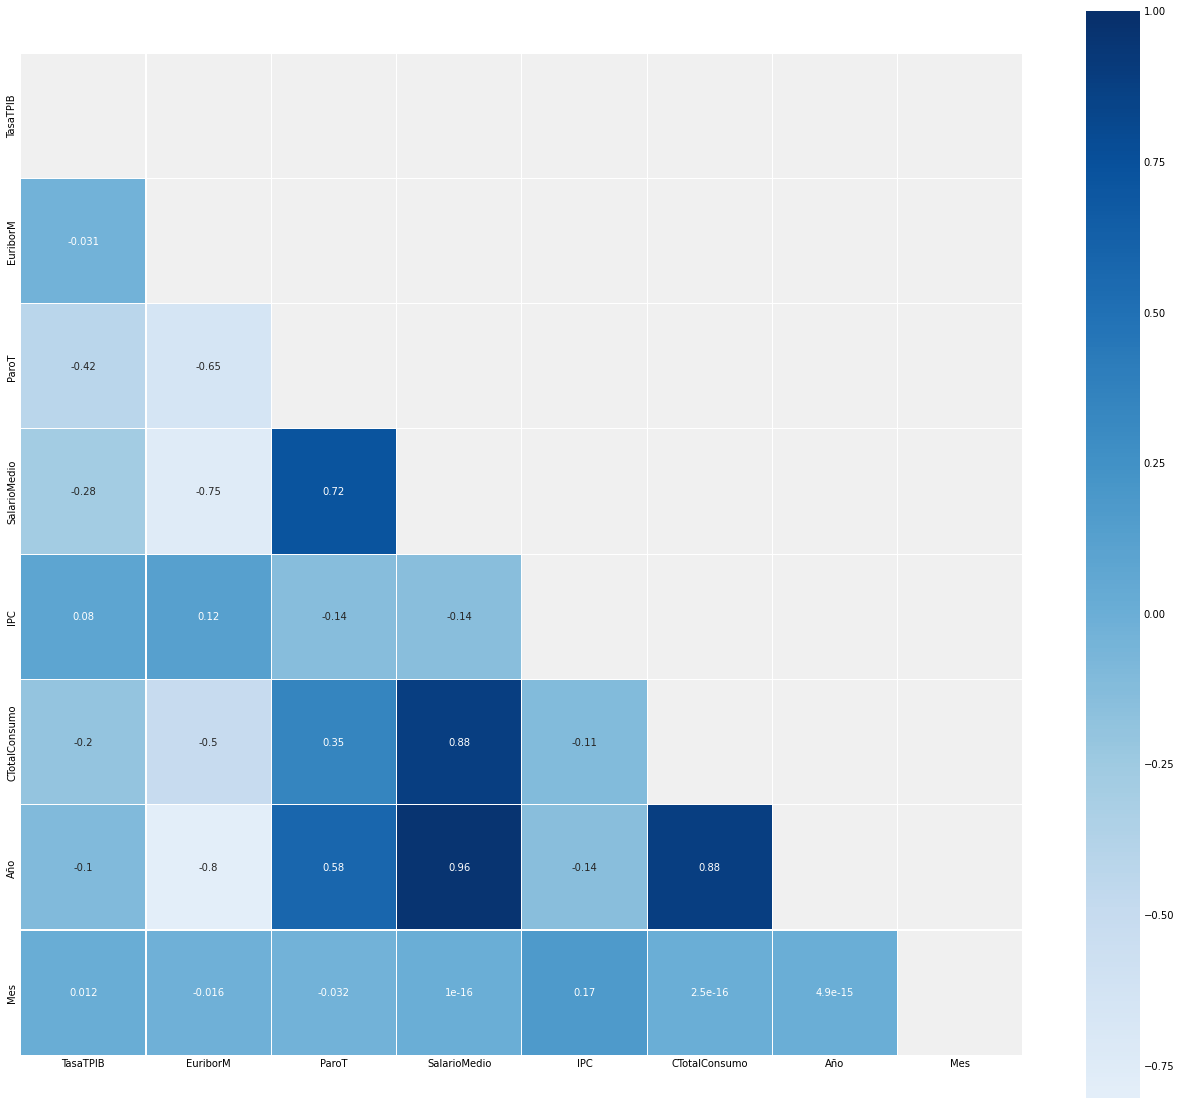

In [16]:
# 3.2 MAPA DE CALOR CORRELACIÓN (PEARSON)

# matriz de correlación
corr = df.corr()

# genera la mascara para el triangulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(20, 20))

# dibuja el mapa de calor con el radio correcto

sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0,
            square=True, linewidths=.1, annot = True)

In [ ]:
"""
# 3.2 MAPA DE CALOR CORRELACIÓN (SPEARMAN)

# matriz de correlación
corr = df.corr(method='spearman')

# genera la mascara para el triangulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(20, 20))

# dibuja el mapa de calor con el radio correcto

sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0,
            square=True, linewidths=.1, annot = True)
"""

"\n# 3.2 MAPA DE CALOR CORRELACIÓN (SPEARMAN)\n\n# matriz de correlación\ncorr = df.corr(method='spearman')\n\n# genera la mascara para el triangulo superior\n\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\n# Set up the matplotlib figure\n\nf, ax = plt.subplots(figsize=(20, 20))\n\n# dibuja el mapa de calor con el radio correcto\n\nsns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0,\n            square=True, linewidths=.1, annot = True)\n"

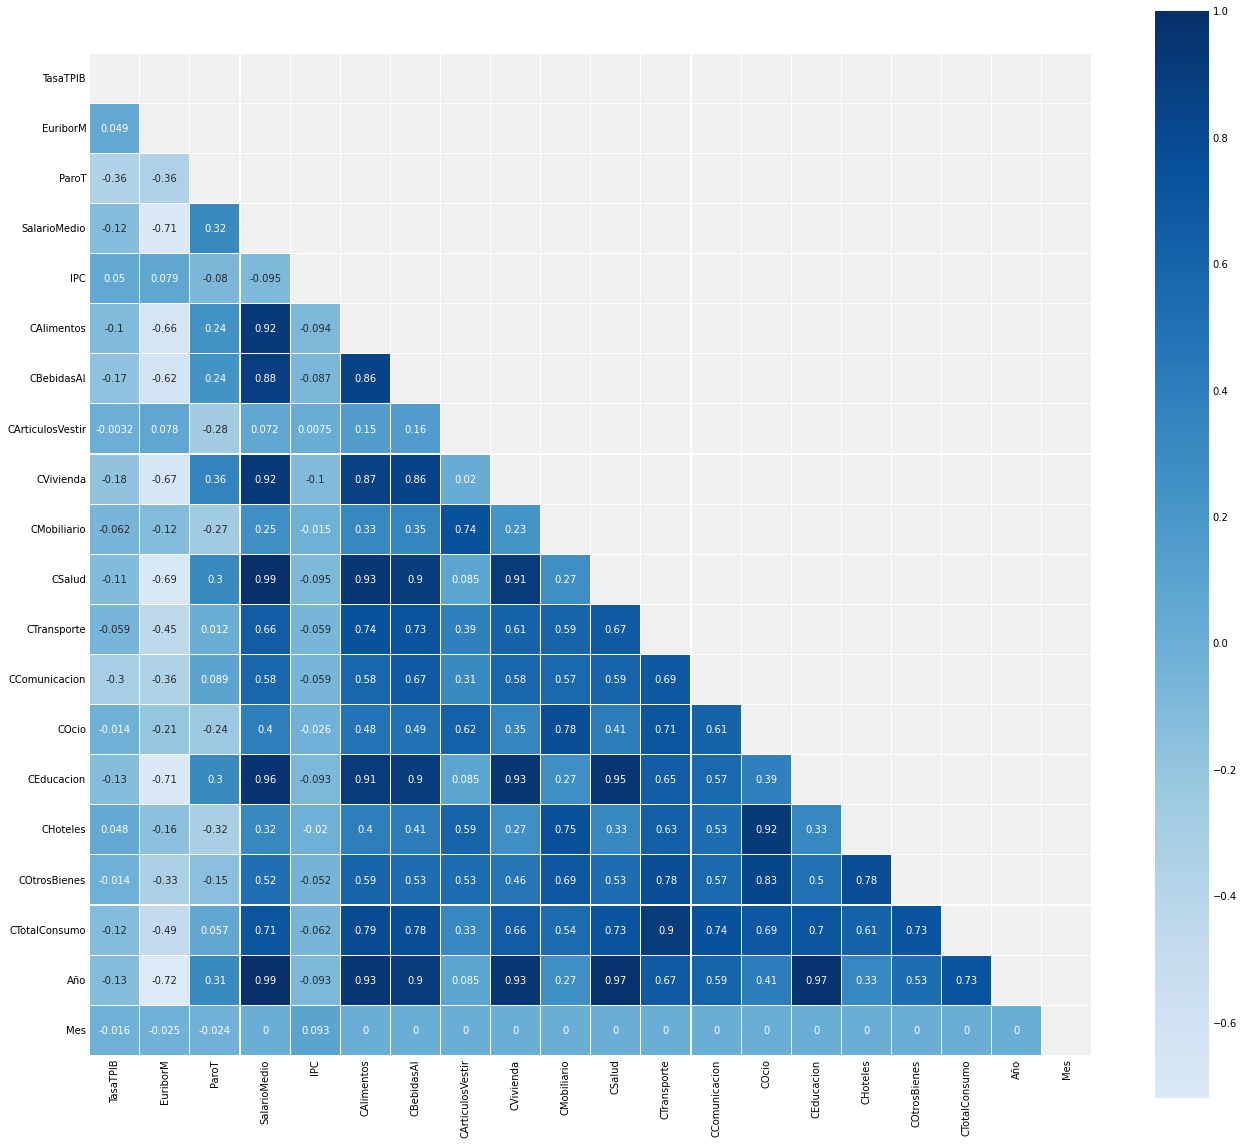

In [ ]:
"""
# 3.2 MAPA DE CALOR CORRELACIÓN (KENDALL)

# matriz de correlación
corr = df.corr(method='kendall')

# genera la mascara para el triangulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(20, 20))

# dibuja el mapa de calor con el radio correcto

sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0,
            square=True, linewidths=.1, annot = True)
"""

In [17]:
# Correlación de las variables con la variable TasaTPIB

corr_values = df.corrwith(df['TasaTPIB'])
print(corr_values)

TasaTPIB         1.000000
EuriborM        -0.031385
ParoT           -0.418852
SalarioMedio    -0.280919
IPC              0.079938
CTotalConsumo   -0.201908
Año             -0.103383
Mes              0.012097
dtype: float64


In [18]:

# Crear una tabla vacía para almacenar los coeficientes de correlación
corr_table = pd.DataFrame(index=df.columns, columns=['Pearson','Spearman','Kendall'])

# Calcular los coeficientes de correlación y almacenarlos en la tabla
for col in df.columns:
    corr_table.loc[col, 'Pearson'] = df['TasaTPIB'].corr(df[col])
    corr_table.loc[col, 'Spearman'] = df['TasaTPIB'].corr(df[col], method='spearman')
    corr_table.loc[col, 'Kendall'] = df['TasaTPIB'].corr(df[col], method='kendall')

# Imprimir la tabla
print(corr_table)


                Pearson  Spearman   Kendall
TasaTPIB            1.0       1.0       1.0
EuriborM      -0.031385  0.097044  0.048904
ParoT         -0.418852 -0.505241  -0.36385
SalarioMedio  -0.280919 -0.194249 -0.115135
IPC            0.079938  0.069333    0.0498
CTotalConsumo -0.201908 -0.213571 -0.115135
Año           -0.103383 -0.206872 -0.127927
Mes            0.012097 -0.020327 -0.016231


In [ ]:
"""
from scipy.stats import shapiro

# Crear una tabla vacía para almacenar los resultados de la prueba de Shapiro-Wilk
shapiro_table = pd.DataFrame(index=df.columns, columns=['W', 'p-value'])

# Realizar la prueba de Shapiro-Wilk para cada columna del dataset
alpha = 0.00000000001
for col in df.columns:
    stat, p = shapiro(df[col])
    shapiro_table.loc[col, 'W'] = stat
    shapiro_table.loc[col, 'p-value'] = p
    if p > alpha:
        shapiro_table.loc[col, 'Conclusion'] = 'Normal'
    else:
        shapiro_table.loc[col, 'Conclusion'] = 'Not normal'
# Imprimir la tabla
print(shapiro_table)
"""


                         W   p-value  Conclusion
TasaTPIB          0.839072       0.0  Not normal
EuriborM          0.919381       0.0      Normal
ParoT             0.929282       0.0      Normal
SalarioMedio      0.864209       0.0  Not normal
IPC               0.976189  0.001025      Normal
CAlimentos        0.943975       0.0      Normal
CBebidasAl        0.867031       0.0  Not normal
CArticulosVestir  0.941931       0.0      Normal
CVivienda         0.837483       0.0  Not normal
CMobiliario       0.911154       0.0      Normal
CSalud            0.963452  0.000023      Normal
CTransporte       0.920569       0.0      Normal
CComunicacion     0.890965       0.0      Normal
COcio             0.970919  0.000197      Normal
CEducacion        0.900084       0.0      Normal
CHoteles          0.960296   0.00001      Normal
COtrosBienes      0.952859  0.000002      Normal
CTotalConsumo     0.897353       0.0      Normal
Año               0.947875       0.0      Normal
Mes               0.

In [ ]:
"""
# Crear una tabla vacía para almacenar los resultados de la prueba de normalidad
normaltest_table = pd.DataFrame(index=df.columns, columns=['Statistic', 'p-value'])

# Realizar la prueba de normalidad para cada columna del dataset
alpha = 0.00000000000000000001
for col in df.columns:
    stat, p = normaltest(df[col])
    normaltest_table.loc[col, 'Statistic'] = stat
    normaltest_table.loc[col, 'p-value'] = p
    if p > alpha:
        normaltest_table.loc[col, 'Conclusion'] = 'Normal'
    else:
        normaltest_table.loc[col, 'Conclusion'] = 'Not normal'

# Imprimir la tabla
print(normaltest_table)
"""

                    Statistic   p-value  Conclusion
TasaTPIB            90.897804       0.0      Normal
EuriborM            20.665747  0.000033      Normal
ParoT               193.56969       0.0  Not normal
SalarioMedio       101.499896       0.0  Not normal
IPC                  9.891311  0.007114      Normal
CAlimentos          11.166242  0.003761      Normal
CBebidasAl          24.591921  0.000005      Normal
CArticulosVestir     9.540981  0.008476      Normal
CVivienda           36.527128       0.0      Normal
CMobiliario         21.331862  0.000023      Normal
CSalud              10.575287  0.005054      Normal
CTransporte          5.707829  0.057618      Normal
CComunicacion        21.84515  0.000018      Normal
COcio                8.276963  0.015947      Normal
CEducacion        1463.397236       0.0  Not normal
CHoteles            10.264127  0.005904      Normal
COtrosBienes         4.930804  0.084975      Normal
CTotalConsumo       18.148337  0.000115      Normal
Año         

In [ ]:
# listamos las variables a explorar, para análisis gráfico

list_to_plot = ['TasaTPIB','EuriborM',
       'ParoT', 'SalarioMedio', 'IPC', 'CTotalConsumo'] 

a


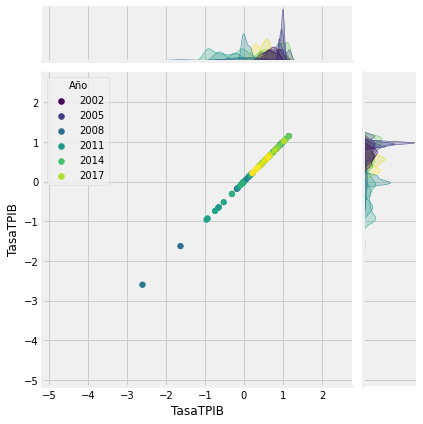

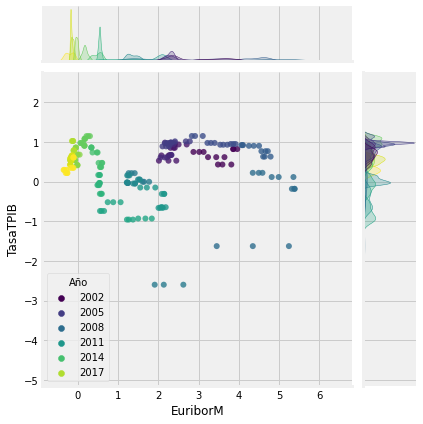

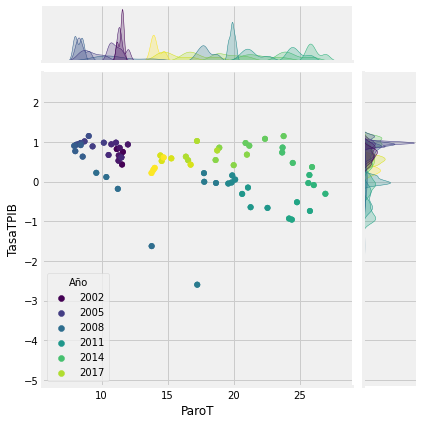

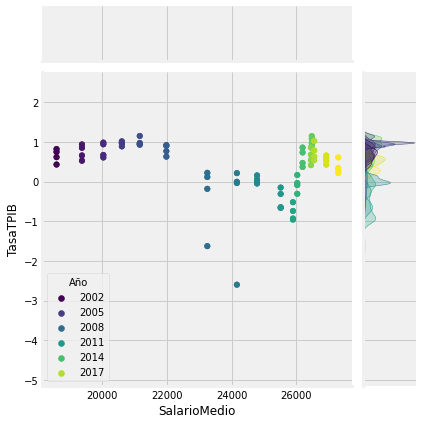

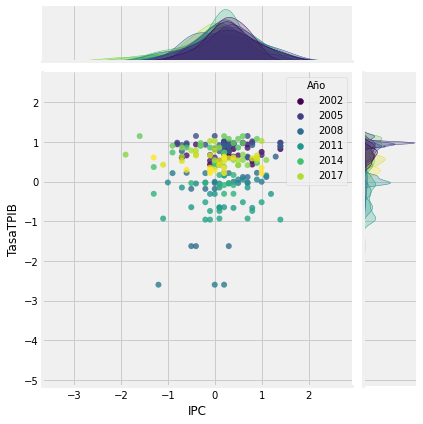

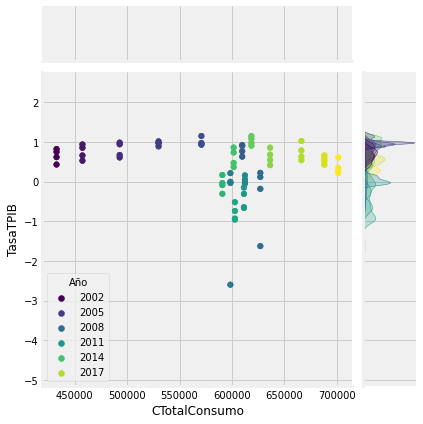

In [ ]:
# Analisis exploratorio de distribución de los datos
 

print('a')
for i in list_to_plot:
  sns.jointplot(data = df, y='TasaTPIB', x = i, hue = 'Año', alpha=.8, linewidth=0, palette = 'viridis')
  plt.show()
  


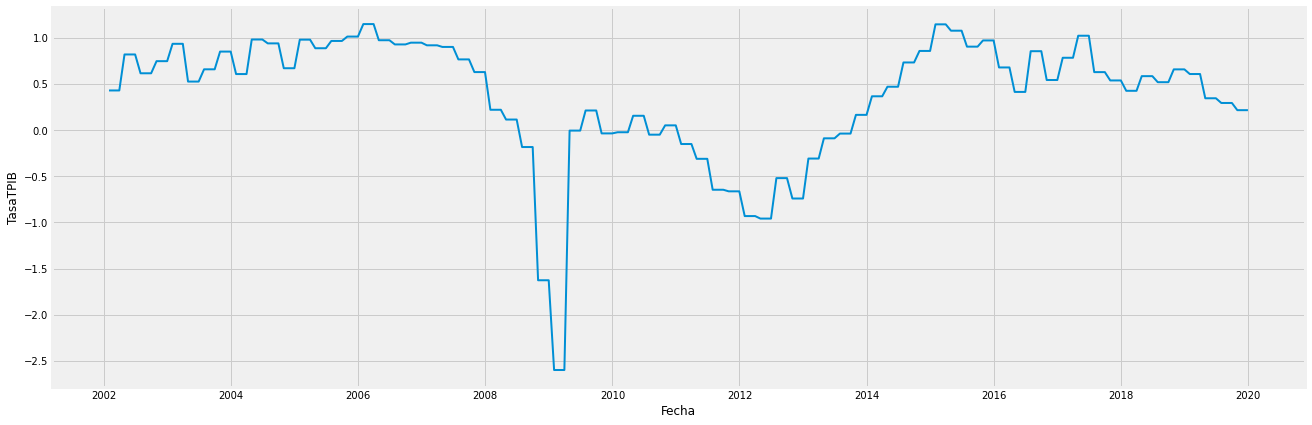

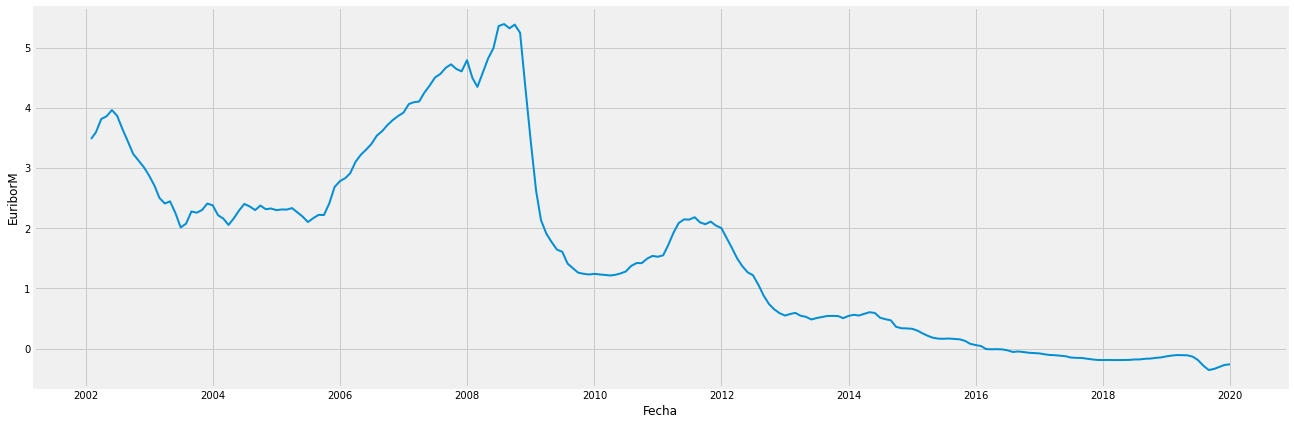

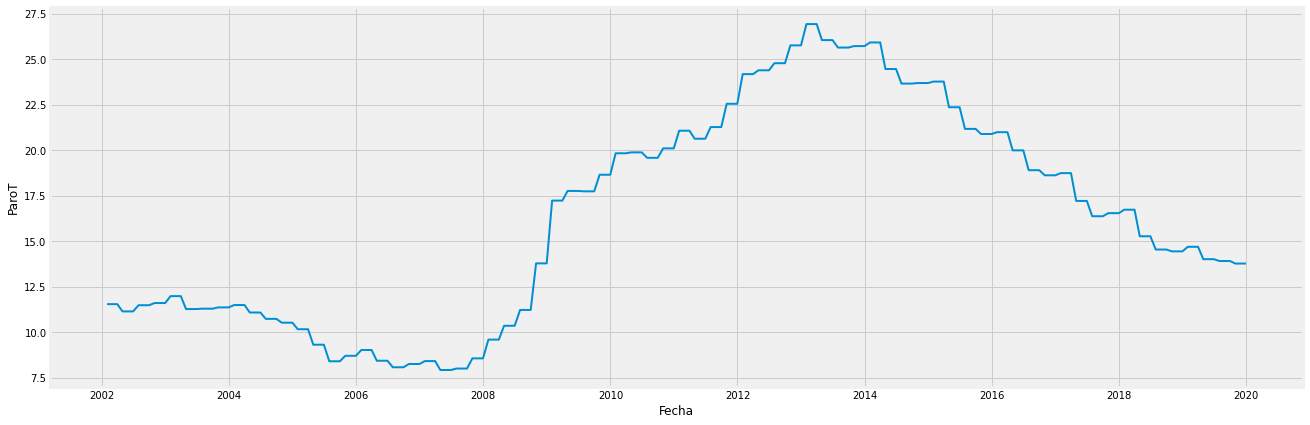

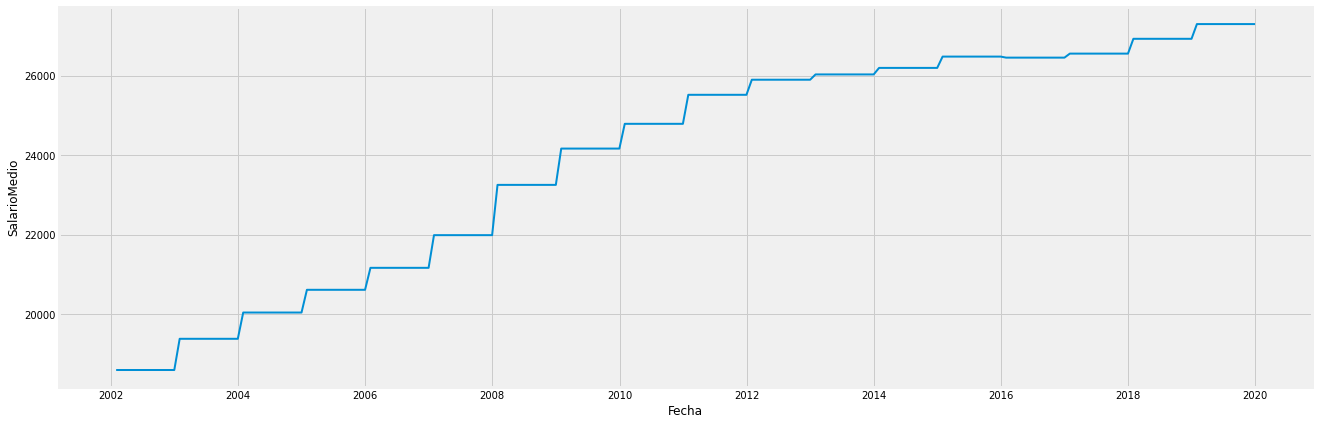

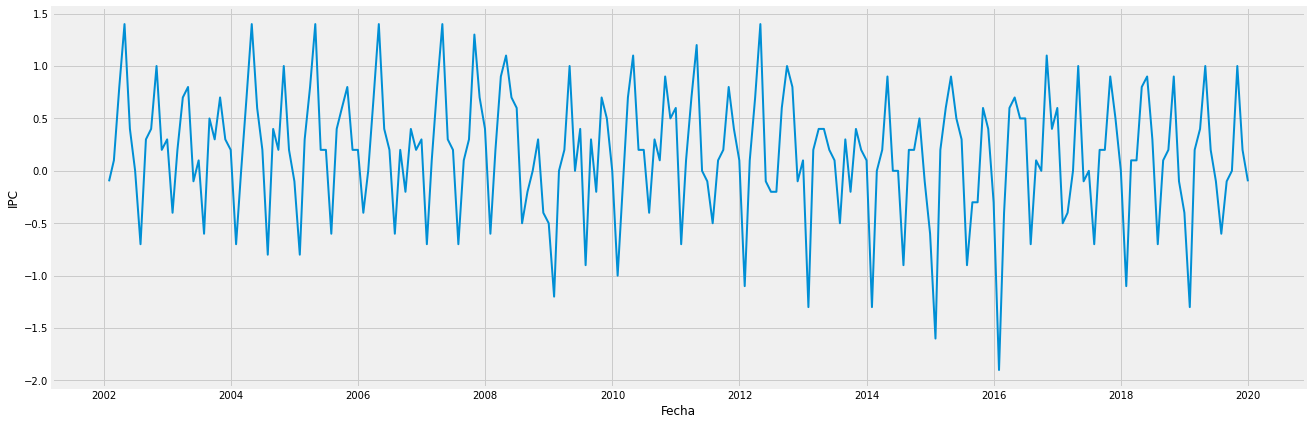

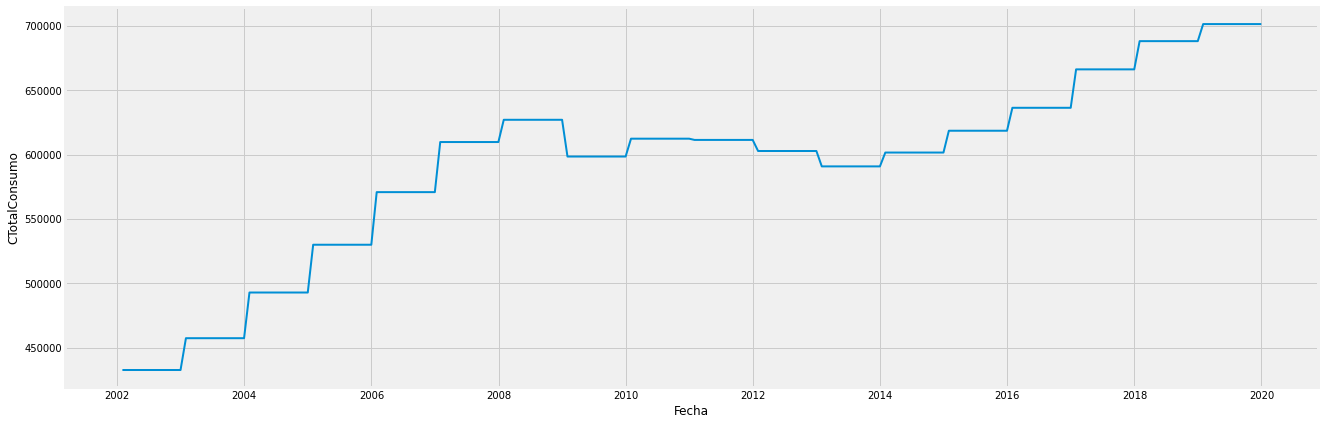

In [ ]:
#Se imprimen los histogrmas de cada una de las variables respecto a la fecha

for i in list_to_plot:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.lineplot(data = df, y=i, x = 'Fecha', linewidth=2)
  plt.show()

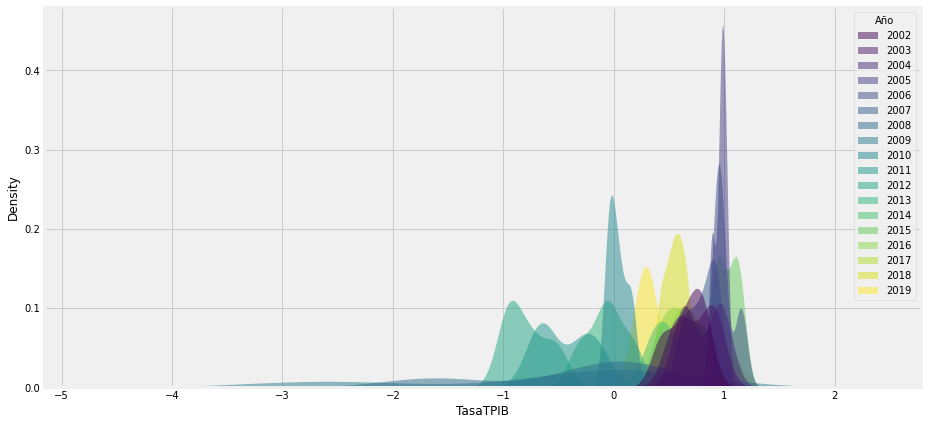

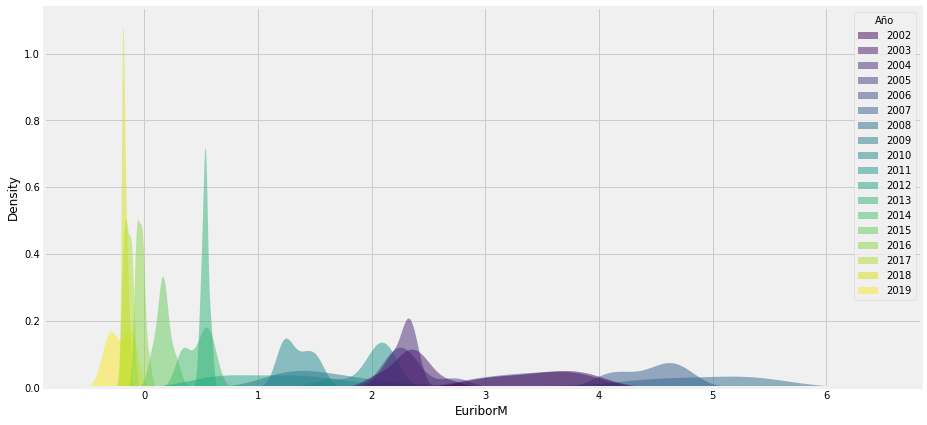

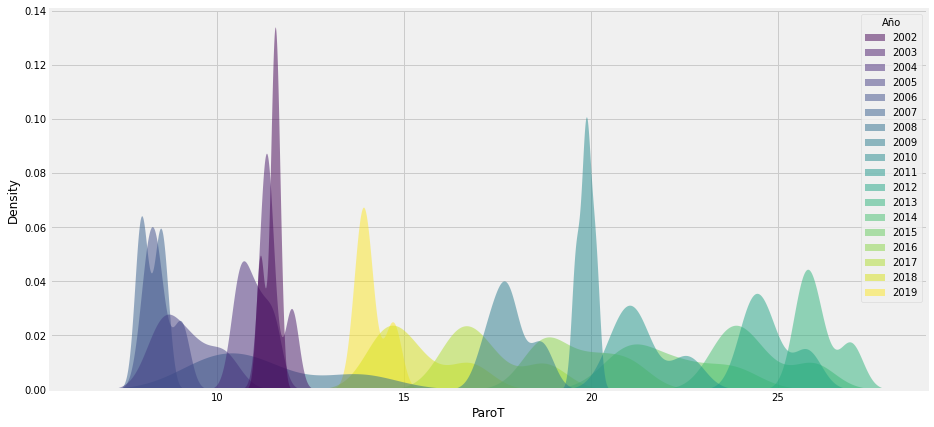

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


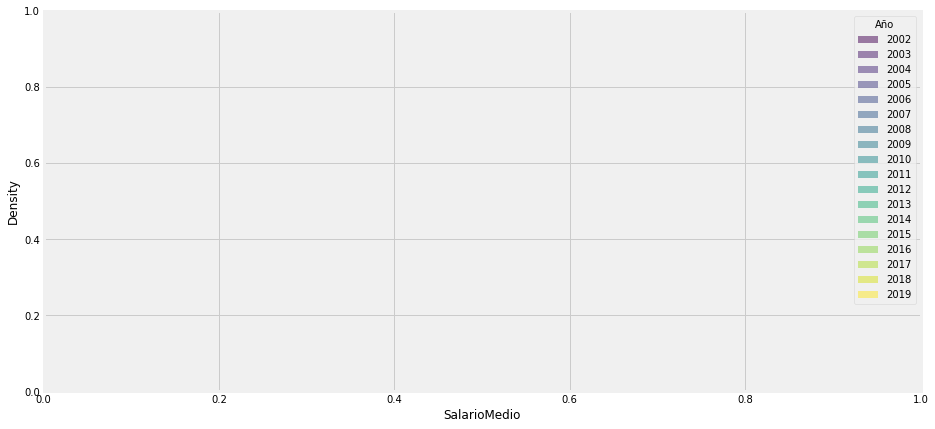

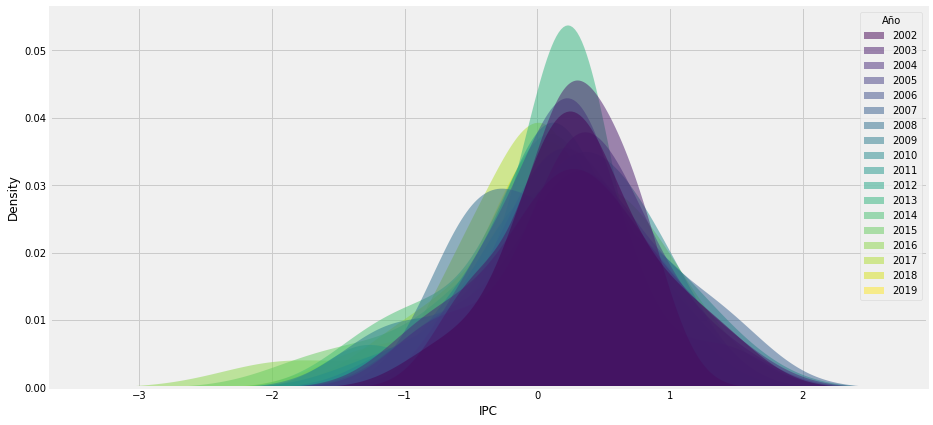

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


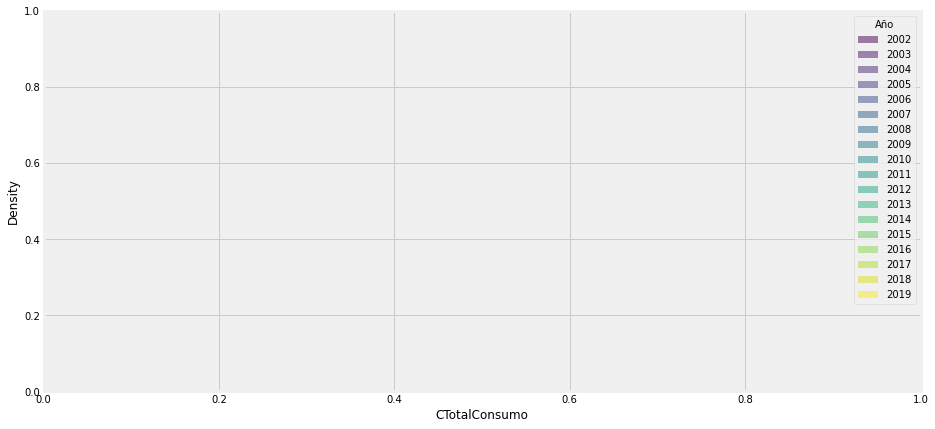

In [ ]:
#Funciones de distribución. Si un año (color) es más anchoimplica que ha habido un cambio en la varianza de la variable, los colores son los años e implican el cambio que ha habido en la media durante los años
#La condición de estacionalidad se cumple si la varianza es la misma durante el tiempo y la media también es la misma.

for i in list_to_plot:
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'Año', fill=True, alpha=.5, linewidth=0, palette = 'viridis')
  plt.show()

In [ ]:
# P- valor
# la prueba ADF sirve para comprobar si existe estacionalidad en las variables, Cuando el estadístico de prueba es menor que el valor crítico mostrado, rechaza la hipótesis nula e infiere que la serie de tiempo es estacional. Si adf es menor que el P-valor se infiere que hay estacionalidad

from statsmodels.tsa.stattools import adfuller
for i in list_to_plot:
  X = df[i].values
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

TasaTPIB
ADF Statistic: -2.060203
p-value: 0.260815
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
EuriborM
ADF Statistic: -1.323494
p-value: 0.618357
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
ParoT
ADF Statistic: -1.596919
p-value: 0.485141
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
SalarioMedio
ADF Statistic: -1.544738
p-value: 0.511276
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
IPC
ADF Statistic: -2.854744
p-value: 0.050869
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
C.TotalConsumo
ADF Statistic: -1.679969
p-value: 0.441461
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


TasaTPIB


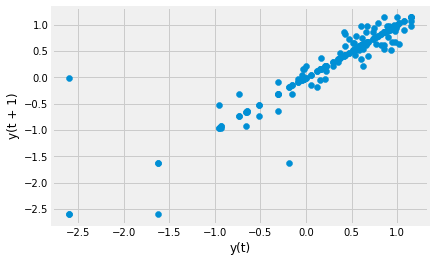

EuriborM


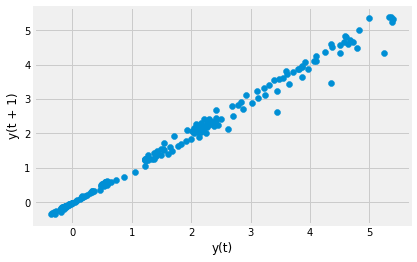

ParoT


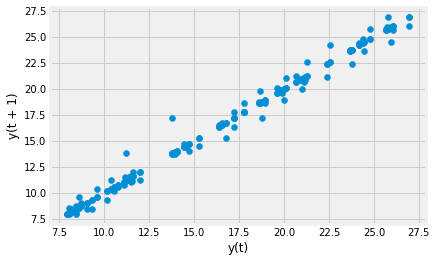

SalarioMedio


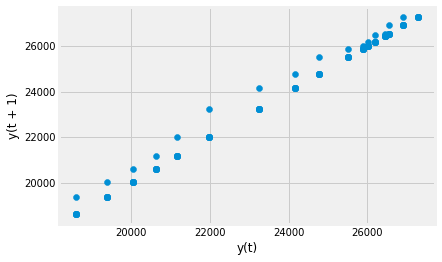

IPC


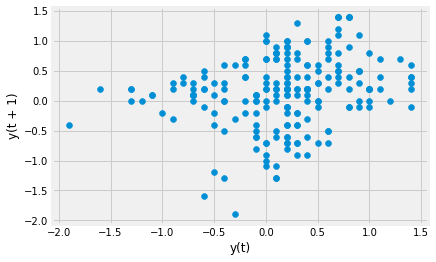

C.TotalConsumo


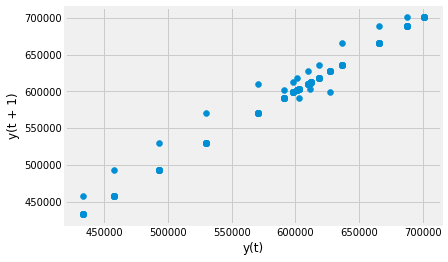

In [ ]:
#Factores autorregresivos de las variables, se puede interpretar que las variables TasaPIB, EuriborM, ParoT, SalarioMedio, tiene un factor autorregresivo lo que implica que lo que esta pasando en el momento T actual tiene que ver con lo que el valor que alcanzó la variable en el momento anterior.
#Sin embargo en el caso del IPC existe una mayor dispersión y parece que no existe esta relación.

from pandas.plotting import lag_plot
for i in list_to_plot:
  print(i)
  lag_plot(df[i])
  plt.show()
  

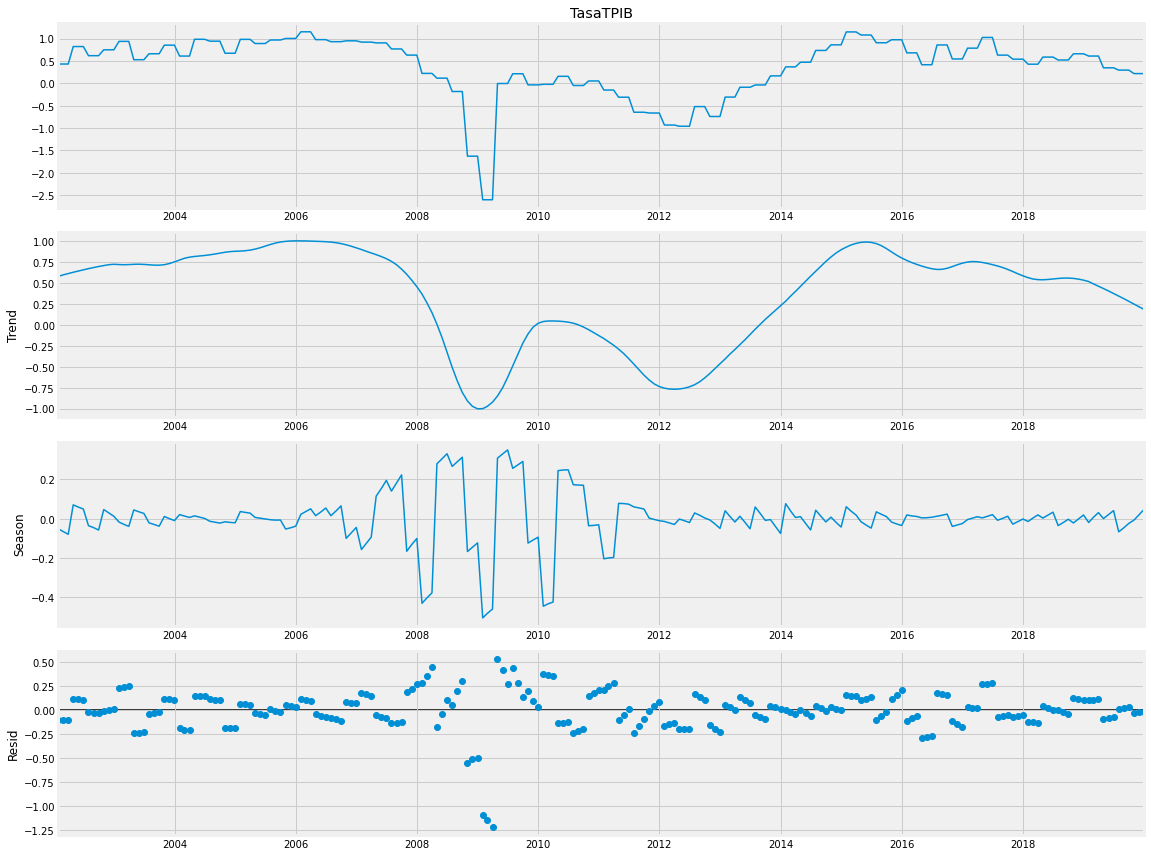

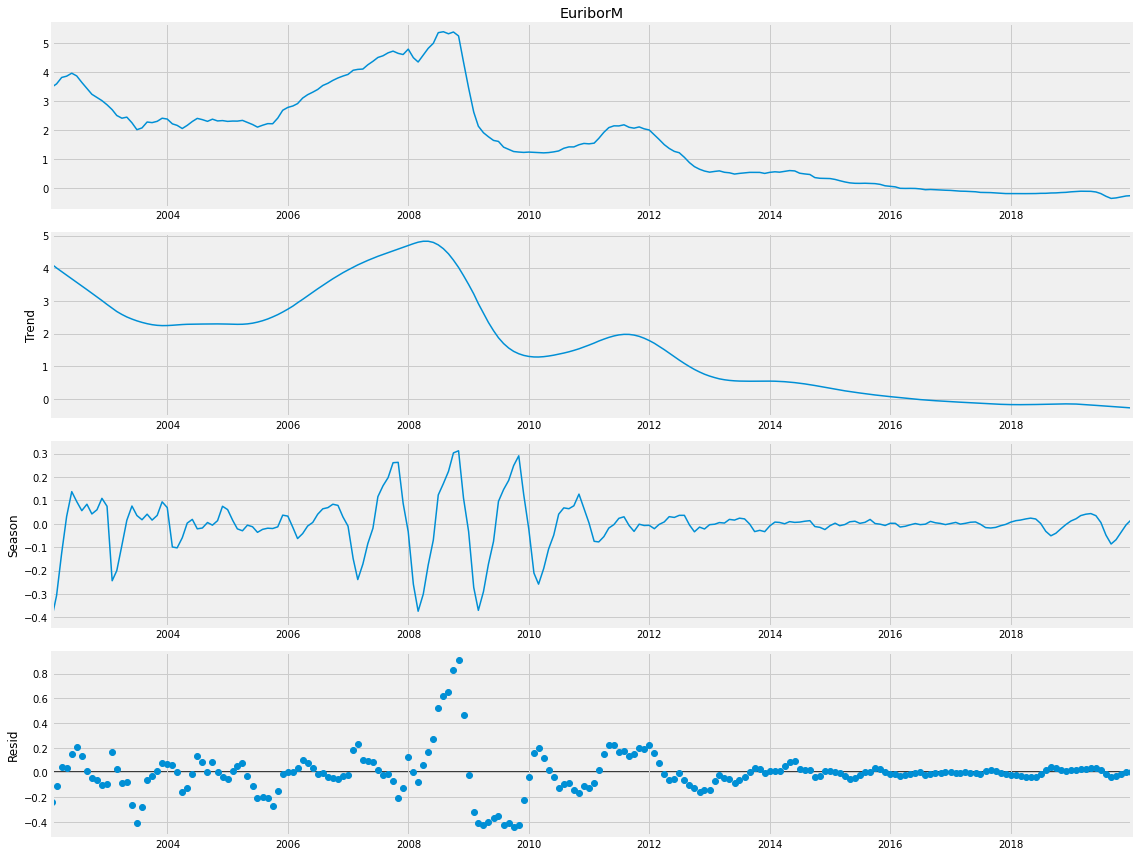

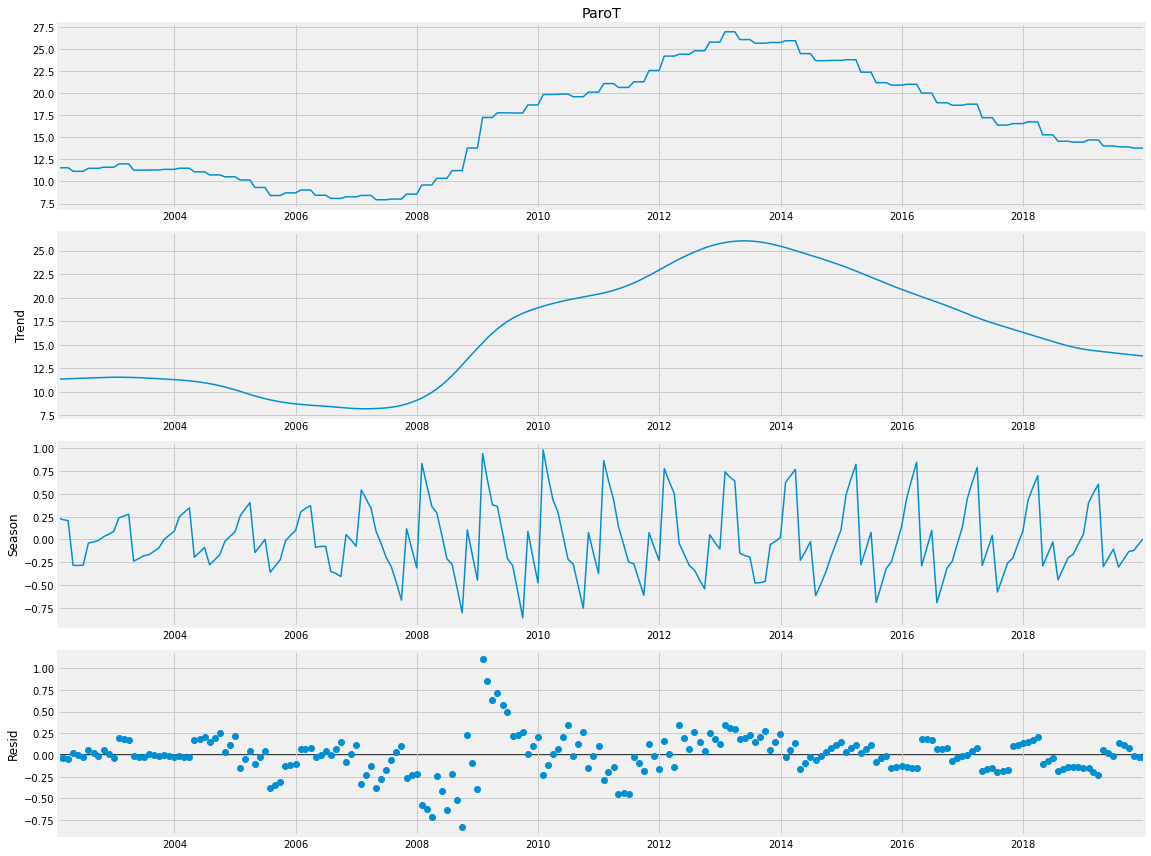

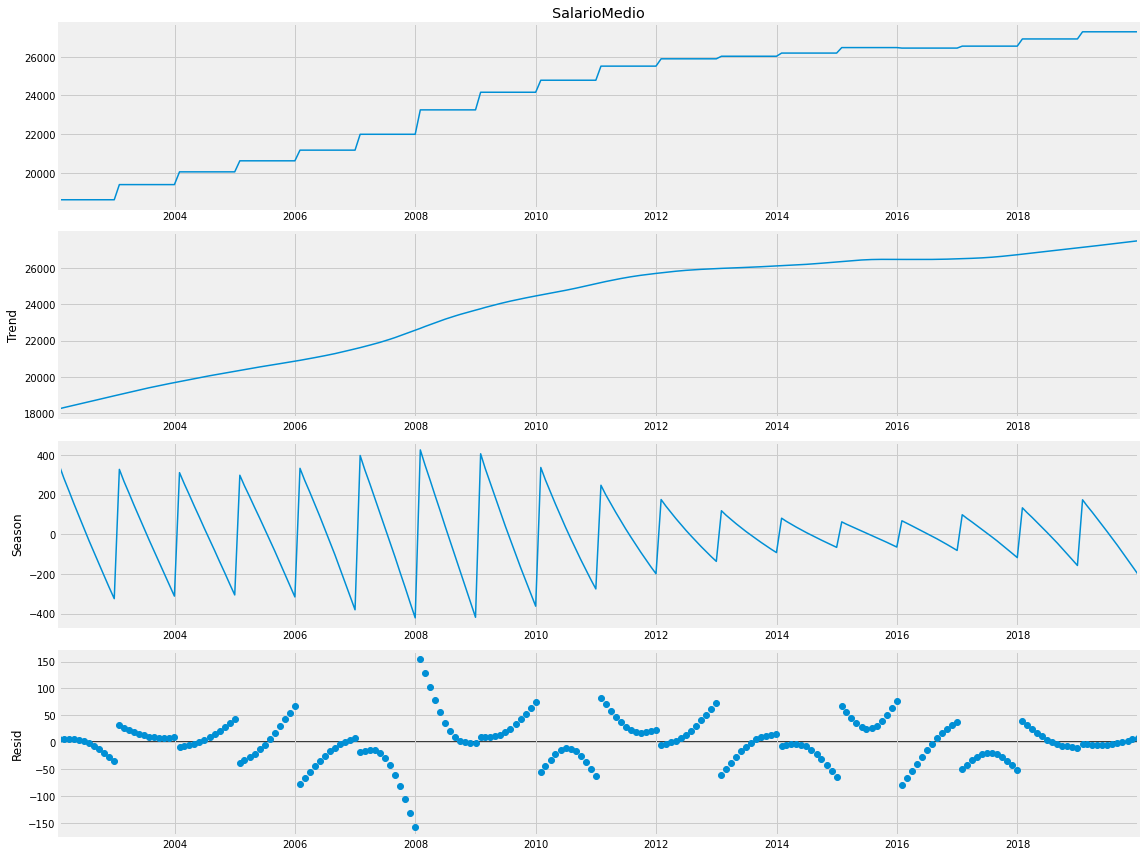

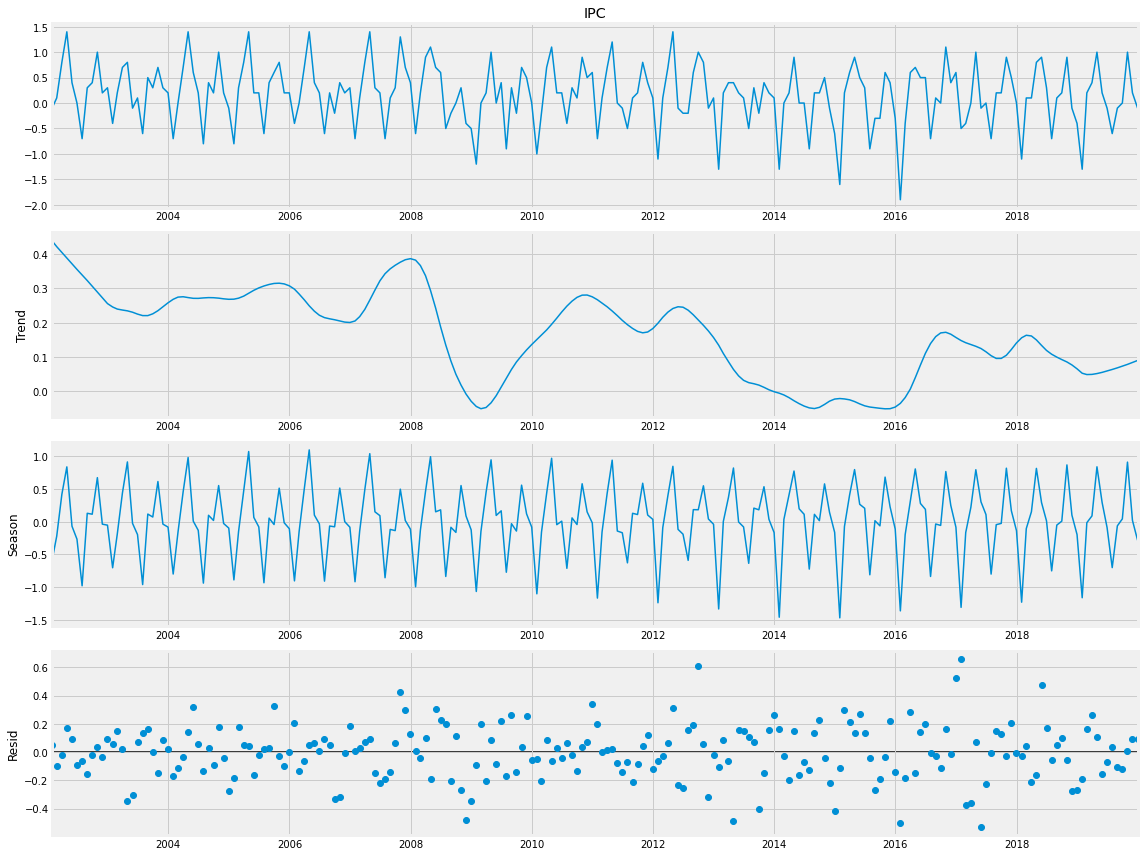

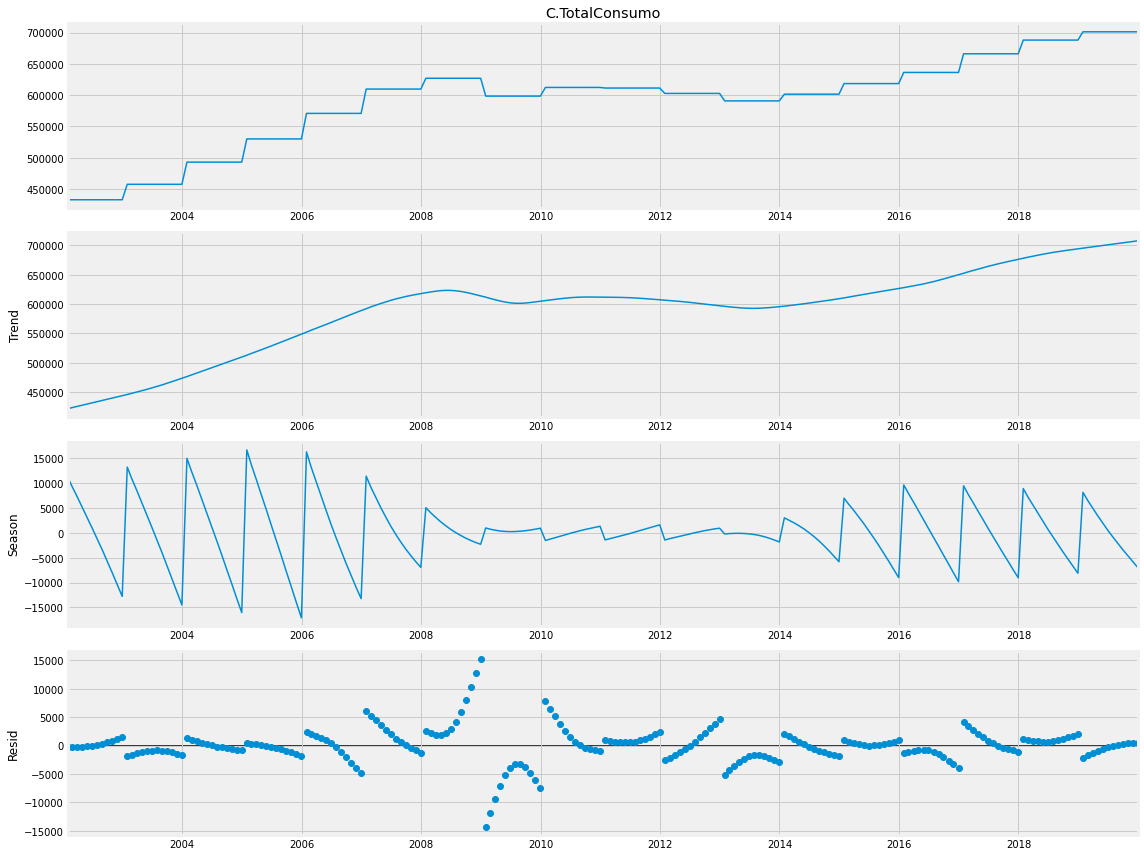

In [ ]:
# Descomposición de series temporales

from statsmodels.tsa.seasonal import STL
for i in list_to_plot:
  plt.rc('figure',figsize=(16,12))
  plt.rc('font',size=10)
  Y = df[i].fillna(0)
  stl = STL(Y)
  res = stl.fit()
  fig = res.plot()

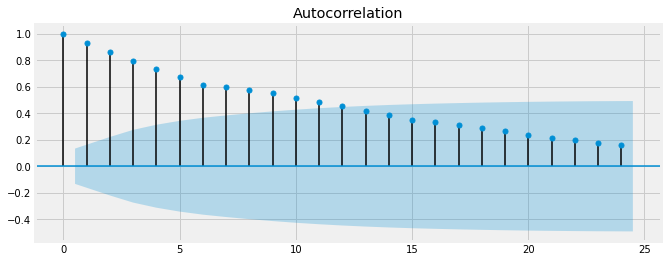

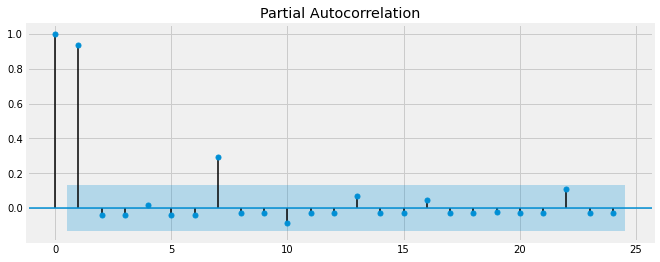

In [ ]:
# Gráfico de autocorrelación PIB
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.TasaTPIB, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial PIB
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.TasaTPIB, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

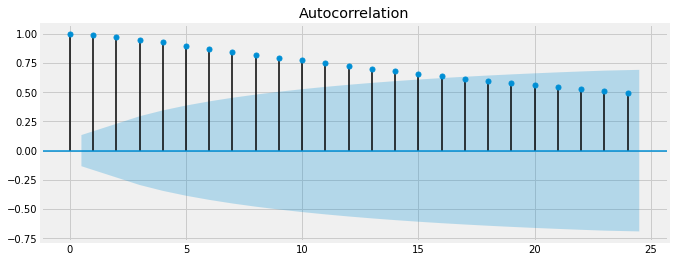

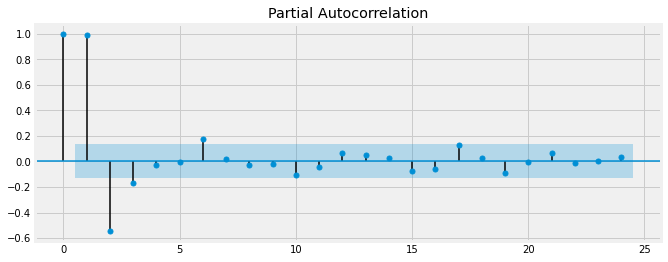

In [ ]:
# Gráfico de autocorrelación EuriborM
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.EuriborM, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial EuriborM
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.EuriborM, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

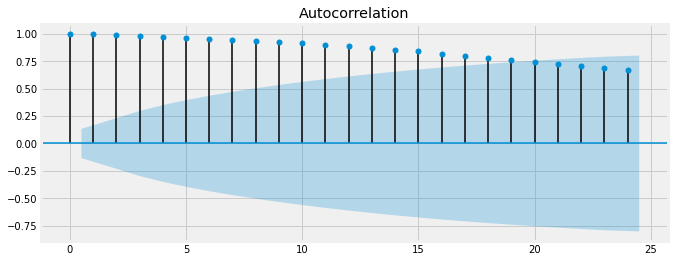

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


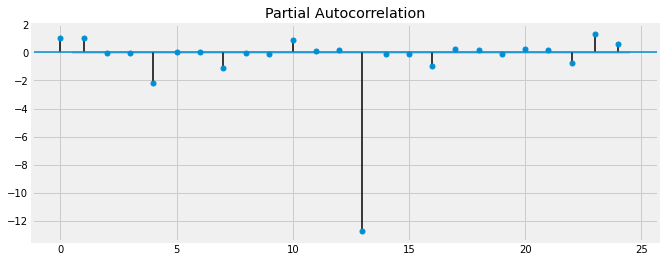

In [ ]:
# Gráfico de autocorrelación ParoT
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.ParoT, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial ParoT
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.ParoT, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

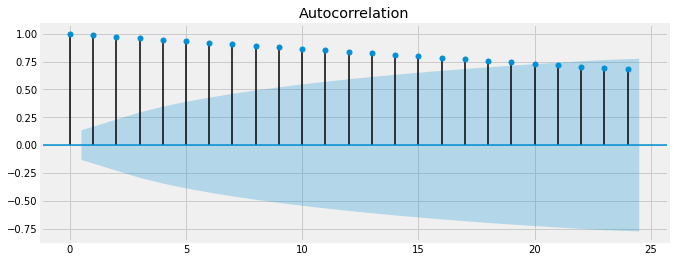

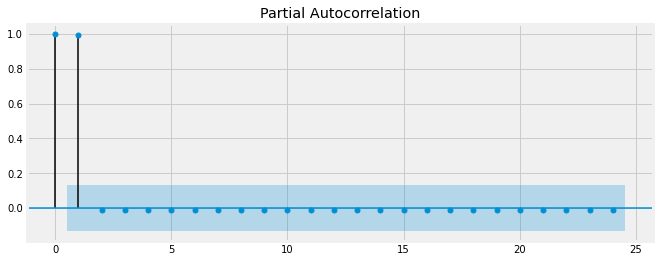

In [ ]:
# Gráfico de autocorrelación SalarioMedio
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.SalarioMedio, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial SalarioMedio
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.SalarioMedio, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

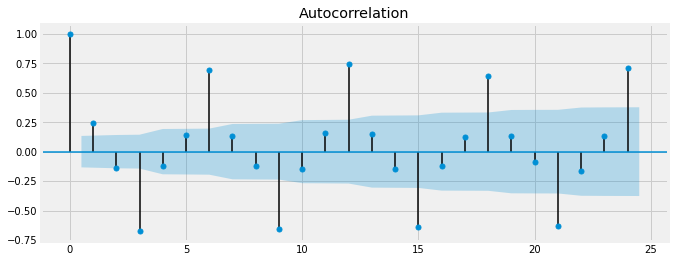

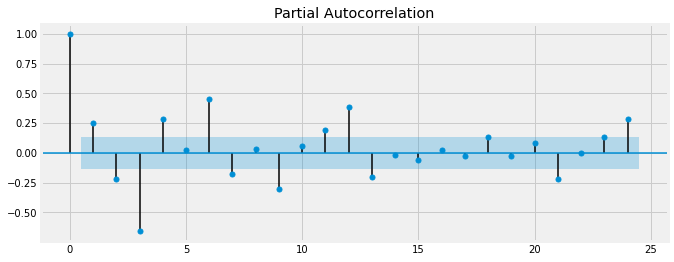

In [ ]:
# Gráfico de autocorrelación IPC
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.IPC, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial IPC
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.IPC, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

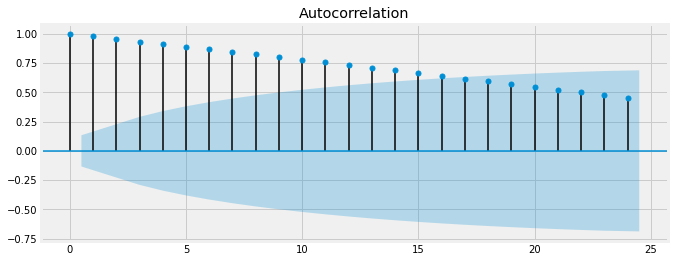

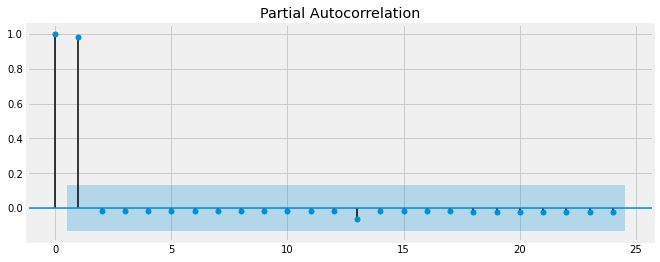

In [ ]:

# Gráfico de autocorrelación CTotalConsumo
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_acf(df.CTotalConsumo, ax=ax, lags=24)
plt.show()

# Gráfico de autocorrelación parcial CTotalConsumo
# ============================
fig, ax = plt.subplots (figsize=(10,4))
plot_pacf(df.CTotalConsumo, ax=ax, lags=24)
plt.show()

# Como se explica esto

# como de relacionado estan desde T-24 a T-1, cone el último valor de la serie, aqui se puede apreciar como disminuye la correlación según vamos aumentando meses de lag, el periodo que más autocorrelacción nos ofrece es T-1
# lo que pasa con el dato de este mes está muy correlacionado con el dato del último mes

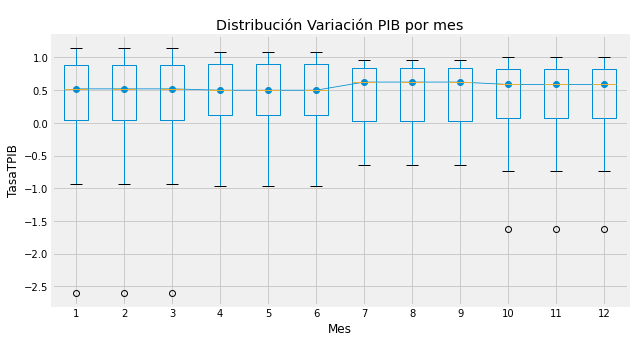

In [ ]:
# Gráfico boxplot para comprobar estacionalidad mensual
# =============================
fig, ax = plt.subplots(figsize=(10,5))
df['Mes'] = df.index.month
df.boxplot(column= 'TasaTPIB', by='Mes', ax=ax)
df.groupby('Mes')['TasaTPIB'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('TasaTPIB')
ax.set_title('Distribución Variación PIB por mes')
fig.suptitle(' ');

#Se aprecia como la variación de PIB es mayor durante los meses de verano y luego va descendiendo hasta Diciembre y hasta el verano del año siguiente.
#Esto es debido a la estacionalidad del turismo, y el gran peso que tiene en el PIB español